# DMQC Report: WMO 4900872

## Current status and metadata: 

- APEX float in the North Pacific that operated from 2006-2011 (4.5 years)
- Completed 164 cycles
- Already in A-mode using in-air data via Henry Bittig
- WOA gain calculated to be 1.0538
- In-air gain currently 1.0472
- Will not change gain, will just visually check data and export D-mode data

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from netCDF4 import Dataset

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4900872 # insert WMO number here
fig_path = Path('../../../figures/') / f'{wmo}' # where to save figures
fig_path.mkdir(exist_ok=True)
bgc.io.get_argo(wmo, local_path=bgc.io.Path.ARGO_PATH) # download the data to ensure you have up to date files
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA') # calculate gain, can change to ref='NCEP' if in-air data is available
print(np.nanmean(gains))

\Users\GordonC\Documents\data\Argo\dac\meds\4900872\4900872_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900872\4900872_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900872\4900872_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900872\4900872_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4900872\4900872_tech.nc
Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data - taking simple average of available data.
Bounding climatological profile(s) missing data -

In [2]:
nc = Dataset(flt.__Sprof__)
print(bgc.io.read_ncstr(nc['SCIENTIFIC_CALIB_COMMENT'][:][50,-1,3,:]))
print(nc['DOXY_ADJUSTED'][:][-1,:]/nc['DOXY'][:][-1,:])
nc.close()

by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 21 slope on PPOX_DOXY; Using in-air obs; No time response correction done; error gives 1 sigma
[1.0472214221954346 1.0472214221954346 1.0472214221954346
 1.0472214221954346 1.0472214221954346 1.0472214221954346
 1.0472214221954346 1.0472214221954346 1.0472214221954346
 1.0472214221954346 1.047221302986145 1.0472214221954346 1.047221302986145
 1.0472214221954346 1.0472214221954346 1.0472215414047241
 1.047221302986145 1.047221302986145 1.0472215414047241 1.0472211837768555
 1.0472215414047241 1.0472215414047241 1.047221302986145 1.047221064567566
 1.0472215414047241 1.0472215414047241 1.0472217798233032
 1.0472214221954346 1.0472217798233032 1.0472217798233032
 1.047221064567566 1.0472215414047241 1.0472211837768555
 1.0472215414047241 1.0472211837768555 1.0472214221954346
 1.0472215414047241 1.047221064567566 1.0472215414047241
 1.0472214221954346 1.0472211837768555 1.0472216606140137
 1.0472211837768555 1.04722

## Visual QC

- Visualize the float and reference surface saturations, as well as the profiles. 
- Observe if DOXY data is set to '3' as it should be or if it is '1' or '2'. 
- Try to note cycles or other identifying features of potentially problematic profiles.

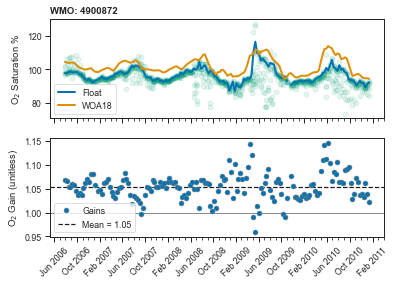

In [4]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_initial.png', bbox_inches='tight', dpi=250)

Figure 1: Top panel: Float oxygen percent saturation (blue line) compared to WOA percent saturation (orange line), with DOXY audit flagged cycle percent saturation (green stars, if applicable) and raw float percent saturation (orange circles). Bottom panel: calculated gains (blue dots) and flagged gains from DOXY audit (orange stars).

Notes: [notes on what this figure tells you here] 

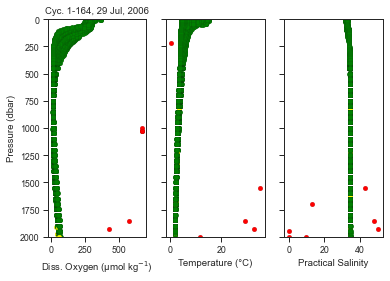

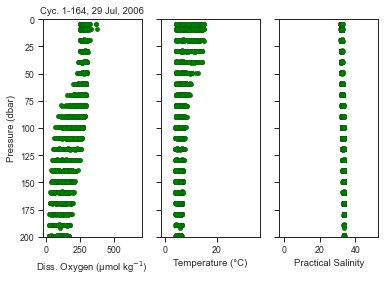

In [5]:
flt.reset()
g = flt.plot('qcprofiles', varlist=['DOXY', 'TEMP', 'PSAL'])
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['DOXY', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g.fig.savefig(fig_path / 'qcprofiles_shallow.png', bbox_inches='tight', dpi=250)

Figures 2,3: Profiles coloured by QC flag (1-2, green, 3, yellow, 4, red) on difference depth scales.

Notes: [notes on what this figure tells you here] 

## Flag bad data, recalculate gain

- Using the plots above (and likely some more specific plots, made on a case-by-case basis), flag bad DOXY data as 4. 
- After flagging bad data, re-clean the data and re-calculate the gains.


Calculating gains using WOA surface data and float O2 percent saturation...
1.0538343264930239


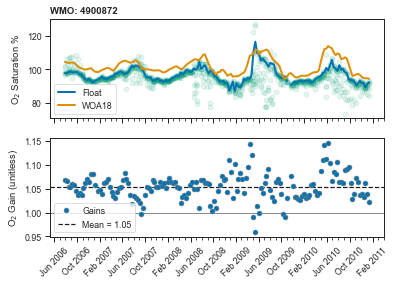

In [6]:
bad_oxygen = [] # index defining where the oxygen should be flagged as bad
flt.update_field('DOXY_QC', 4, where=bad_oxygen)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=bad_oxygen)
flt.clean()
new_gains = flt.calc_gains(ref='WOA')
print(np.nanmean(new_gains))

g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_final.png', bbox_inches='tight', dpi=250)

Figure x: Repeated gain plot with bad data removed.

## Update Fields and Export

- DOXY should be 3 by default, but many old floats have 1 or 0. Though it will be redundant in some cases, make sure DOXY_QC is not good.
- Apply the gain to calculate DOXY_ADJUSTED. 
- Fill in DOXY_ADJUSTED_ERROR with an appropriate fixed value.
- Fill in DOXY_ADJUSTED_QC. 
- Make sure DOXY_ADJUSTED and DOXY_ADJUSTED_ERROR are `FillValue` wherever DOXY_ADJUSTED_QC is bad.
- Export the D-mode files. During export, HISTORY parameters will be filled as well as SCIENTIFIC_CALIB parameters using some default structures and user info set by calling `bgc.configure.configure()`.

In [4]:
# make sure DOXY_QC is 3 instead of 0,1,2
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC.isin([0, 1, 2]))
# fill in DOXY_ADJUSTED_QC appropriately
# flt.update_field('DOXY_ADJUSTED_QC', flt.DOXY_QC)
# flt.update_field('DOXY_ADJUSTED_QC', 1, where=flt.DOXY_ADJUSTED_QC.isin([0, 3]))
# flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.TEMP_ADJUSTED_QC == 4)
# flt.update_field('DOXY_ADJUSTED_QC', 3, where=flt.PSAL_ADJUSTED_QC == 4)
# make sure the data is FillValues where adjusted values are still bad
flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.DOXY_ADJUSTED.isna())
flt.set_fillvalue('DOXY_ADJUSTED', where=flt.DOXY_ADJUSTED_QC == 4)
flt.set_fillvalue('DOXY_ADJUSTED_ERROR', where=flt.DOXY_ADJUSTED_QC == 4)

In [5]:
# export the files
comment = 'by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 21 slope on PPOX_DOXY; Using in-air obs; No time response correction done; error gives 1 sigma'
comment += f"; Visual QC by Christopher Gordon (DFO, ORCID {bgc.config['orcid']})"
comment = comment.replace('No time response correction done;', '')
flt.export_files(data_mode='D', comment=comment, coeff='previous', equation='previous')

Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_001.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_002.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_003.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_004.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_005.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_006.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_007.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_008.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4900872/profiles/BD4900872_009.nc...done
Working on

In [6]:
from pathlib import Path
import pandas as pd
from netCDF4 import Dataset
import copy

loc = Path(f'/Users/GordonC/Documents/data/Argo/dac/meds/D/{wmo}/profiles/')
files = pd.read_csv(Path(f'../../../checker/summary/{wmo}/files.txt'))
varname = 'DOXY'
for fn in files.files:
    print(fn)
    nc = Dataset(loc / fn, 'r+')
    print(nc['DOXY'][:])
    flags = copy.deepcopy(nc[varname+'_QC'][:])
    flags[nc[varname][:].mask] = b'9'
    nc[varname+'_QC'][:] = flags
    if varname == 'DOXY':
        flags = copy.deepcopy(nc[varname+'_ADJUSTED_QC'][:])
        flags[nc[varname][:].mask] = b'9'
        nc[varname+'_ADJUSTED_QC'][:] = flags
    profile = copy.deepcopy(nc['PROFILE_DOXY_QC'][:])
    profile[0] = b'A'
    nc['PROFILE_DOXY_QC'][:] = profile
    nc.close()

BD4900872_036.nc
[[266.9219665527344 268.2200927734375 272.9729919433594 276.6265869140625
  283.6265563964844 285.595458984375 285.2728576660156 282.48370361328125
  274.88348388671875 263.15753173828125 232.12738037109375
  188.83335876464844 158.87281799316406 154.25070190429688
  150.99237060546875 158.45281982421875 171.25872802734375
  172.9165802001953 169.00204467773438 160.52786254882812
  153.15676879882812 147.08578491210938 140.6775360107422
  136.70265197753906 131.9098663330078 124.78607940673828
  116.01872253417969 106.44276428222656 97.52181243896484
  89.62609100341797 77.11830139160156 72.80782318115234 71.23942565917969
  65.93867492675781 59.82103729248047 54.748531341552734
  52.88440704345703 54.83716583251953 53.75874710083008 47.49516677856445
  35.66069412231445 25.95404624938965 22.292098999023438
  14.804758071899414 13.105224609375 11.592998504638672
  11.581365585327148 12.043882369995117 11.535585403442383
  11.179232597351074 --]]
BD4900872_088.nc
[[272.